In [2]:
import numpy as np
import pandas as pd

df = pd.read_csv("Kraken_BTCUSD_d.csv", header=1)

df["Open_before"] = df["Open"].shift(-1)
df["Open_changes"] = (df["Open"] / df["Open_before"]) - 1

df = df.dropna()

changes = df["Open_changes"]

X = []
Y = []

for i in range(0, len(changes) - 20):
    Y.append(changes[i])
    X.append(np.array(changes[i+1:i+21][::-1]))
    
X = np.array(X).reshape(-1, 20, 1)
Y = np.array(Y)

In [3]:
from keras.models import Sequential
from keras.layers import LSTM

model = Sequential()
model.add(LSTM(1, input_shape=(20, 1)))

model.compile(optimizer="rmsprop", loss="mse")
model.fit(X, Y, batch_size=32, epochs=10)

/Users/jannis/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


Epoch 1/10
1750/1750 [==============================] - 1s 809us/step - loss: 0.0021
Epoch 2/10
1750/1750 [==============================] - 1s 516us/step - loss: 0.0021
Epoch 3/10
1750/1750 [==============================] - 1s 517us/step - loss: 0.0021
Epoch 4/10
1750/1750 [==============================] - 1s 507us/step - loss: 0.0021
Epoch 5/10
1750/1750 [==============================] - 1s 511us/step - loss: 0.0021
Epoch 6/10
1750/1750 [==============================] - 1s 517us/step - loss: 0.0021
Epoch 7/10
1750/1750 [==============================] - 1s 515us/step - loss: 0.0021
Epoch 8/10
1750/1750 [==============================] - 1s 545us/step - loss: 0.0021
Epoch 9/10
1750/1750 [==============================] - 1s 570us/step - loss: 0.0021
Epoch 10/10
1750/1750 [==============================] - 1s 540us/step - loss: 0.0020


In [4]:
predictions = model.predict(X)

In [5]:
predictions = predictions.reshape(-1)

In [6]:
predictions.shape

(1750,)

In [7]:
len(df)

1770

In [8]:
predictions = np.append(predictions, np.zeros(20))

In [9]:
predictions.shape

(1770,)

In [10]:
df["predictions"] = predictions

In [11]:
df.head()

,Date,Symbol,Open,High,Low,Close,Volume From,Volume To,Open_before,Open_changes,predictions
0,2018-08-11,BTCUSD,6141.5,6228.9,5969.6,6228.9,2586.37,15763120.05,6536.0,-0.060358,0.006920
1,2018-08-10,BTCUSD,6536.0,6579.1,6010.0,6141.5,7526.91,47487206.71,6275.9,0.041444,0.007100
2,2018-08-09,BTCUSD,6275.9,6630.5,6179.1,6536.0,5942.17,38175637.90,6717.8,-0.065780,0.006929
3,2018-08-08,BTCUSD,6717.8,6717.8,6120.0,6275.9,9468.23,60523770.56,6935.7,-0.031417,0.006884
4,2018-08-07,BTCUSD,6935.7,7149.0,6659.9,6717.8,6505.50,45042696.31,7026.9,-0.012979,0.006933


In [12]:
6536.0 * (1 + 0.004904)

6568.052544

In [13]:
6536.0 * (1 -0.060358)

6141.500112

In [14]:
df["Open_predicted"] = df["Open_before"] * (1 + df["predictions"])

In [15]:
df.index

Int64Index([   0,    1,    2,    3,    4,    5,    6,    7,    8,    9,
            ...
            1760, 1761, 1762, 1763, 1764, 1765, 1766, 1767, 1768, 1769],
           dtype='int64', length=1770)

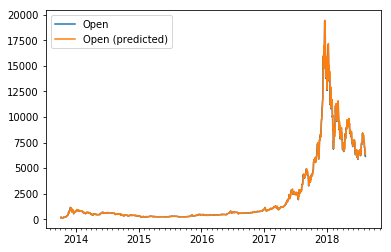

In [17]:

%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.cbook as cbook

years = mdates.YearLocator()   # every year
months = mdates.MonthLocator()  # every month
yearsFmt = mdates.DateFormatter('%Y')

# format the ticks
ax = plt.gca()
ax.xaxis.set_major_locator(years)
ax.xaxis.set_major_formatter(yearsFmt)
ax.xaxis.set_minor_locator(months)

dates = np.array(df["Date"]).astype(np.datetime64)

plt.plot(dates, df["Open"], label="Open")
plt.plot(dates, df["Open_predicted"], label="Open (predicted)")

plt.legend()

plt.show()

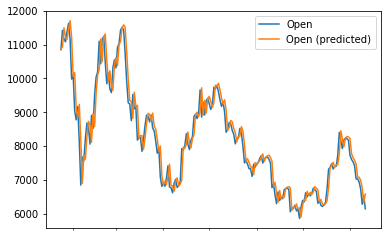

In [23]:

%matplotlib inline

import matplotlib.pyplot as t
import matplotlib.dates as mdates
import matplotlib.cbook as cbook

years = mdates.YearLocator()   # every year
months = mdates.MonthLocator()  # every month
yearsFmt = mdates.DateFormatter('%Y')

# format the ticks
ax = plt.gca()
ax.xaxis.set_major_locator(years)
ax.xaxis.set_major_formatter(yearsFmt)
ax.xaxis.set_minor_locator(months)

dates = np.array(df["Date"]).astype(np.datetime64)

plt.plot(dates[:200], df["Open"][:200], label="Open")
plt.plot(dates[:200], df["Open_predicted"][:200], label="Open (predicted)")

plt.legend()

plt.show()